# Lotka–Volterra model(Lišky a Králíci)

V tomto projektu budeme modelovat  Lotka–Volterra model, který popisuje stav dvou provázaných populací, pretátorů a kořisti. Jedná se o soustavu diferenciálních rovnic ve tvaru

$$ 
r' = \alpha r - \beta r p,\\
p' = \delta r p - \gamma p, \\
\alpha' = 0,\\
\beta' = 0,\\
\gamma' = 0,\\
\delta' = 0,
$$

kde funkce $r$ času $t$ vyjadřuje množství kořisti, např. kralíků (proto $r$ - rabbits), a funkce $p$ času $t$ vyjadřuje množství predátorů, např. lišek (proto $p$ - predators). Pro parametry platí $\alpha , \beta, \gamma , \delta \in \mathbb{R}^+$.
Tyto parametry vyjadřují
$$\begin{align*}
    \alpha &- \text{ parametr přibývání kořisti}\\
    \beta &- \text{ efekt predátora na populačním růst kořisti}\\
    \gamma &- \text{ parametr přibývání predátora}\\
    \delta &- \text{ efekt kořisti na populačním růstu predátora}
\end{align*}$$
V rámci kalmánova filtru budeme za neznámé považovat i parametry $\alpha , \beta, \gamma , \delta$.
Současně víme že budeme pozorovat pouze veličiny $r$ a $p$.



Model budeme vyhodnocovat po časových krocích $\Delta$.
Označme $r_k = r(k \Delta)$, $p_k = p(k \Delta)$, $\alpha_k = \alpha(k \Delta)$, $\beta_k = \beta(k \Delta)$, $\gamma_k = \gamma(k \Delta)$ a $\delta_k = \delta(k \Delta)$.
Aplikací integrálu na výše uvedenou soustavu získáme:
$$
    r_{k} - r_{k-1} = \int_{(k-1)\Delta}^{k \Delta} \alpha r(t) - \beta r(t) p(t) \,dt, \\
    p_{k} - p_{k-1} = \int_{(k-1)\Delta}^{k \Delta} \delta r(t)p(t) - \gamma p(t) \,dt ,\\
    \alpha_k -\alpha_{k-1} = 0,\\
    \beta_k -\beta_{k-1} = 0,\\
    \gamma_k -\gamma_{k-1} = 0,\\
    \delta_k -\delta_{k-1} = 0.
$$

Po vyjádření integrálů napravé straně obdelníkovým pravidlem dostaneme:
$$
    r_{k} = r_{k-1} + \Delta(\alpha_{k-1} r_{k-1} - \beta_{k-1} r_{k-1} p_{k-1}), \\
    p_{k} = p_{k-1} + \Delta (\delta_{k-1} r_{k-1} p_{k-1} - \gamma_{k-1} p_{k-1}), \\
    \alpha_k = \alpha_{k-1},\\
    \beta_k = \beta_{k-1},\\
    \gamma_k = \gamma_{k-1},\\
    \delta_k = \delta_{k-1},\\
$$


Vyjádřeme nyní jednotlivé funkce, matice avektory použité ve zobecněném Kalmánově filtru.
Označme 
$$ \mu_k = (r_k, p_k ,\alpha_k, \beta_k, \gamma_k, \delta_k) .$$

Platí 
$$
    f_k(\mu) = f_k(r, p ,\alpha, \beta, \gamma, \delta) = (r + \Delta(\alpha r - \beta r p), p + \Delta (\delta r p - \gamma p), \alpha, \beta, \gamma, \delta),\\
$$

$$
    \textbf{F}_k = Jf_k(\mu_{k-1}) =  
    \begin{bmatrix}
    1 + \Delta(\alpha_{k-1} - \beta_{k-1} p_{k-1}) & -\Delta \beta_{k-1} r_{k-1}  & \Delta r_{k-1} & -\Delta r_{k-1}  p_{k-1} & 0 & 0 \\

    \Delta \delta_{k-1} p_{k-1} & 1 + \Delta(\delta_{k-1} r_{k-1} - \gamma_{k-1}) & 0 & 0 & -\Delta p_{k-1} & \Delta r_{k-1} p_{k-1} \\
    0&0&1&0&0&0\\
    0&0&0&1&0&0\\
    0&0&0&0&1&0\\
    0&0&0&0&0&1
    \end{bmatrix}
$$

$$
    R_k = 
    \begin{bmatrix}
        (0,1 r_k)^2 & 0 \\
        0& (0,1 p_k)^2
    \end{bmatrix}
$$

Protože budeme pozorovat pouze hodnoty $r$ a $p$, platí:
$$
    y_k \in \mathbb{R}^2
$$
$$
    g(\mu) = g(r, p ,\alpha, \beta, \gamma, \delta) = (r, p)
$$
a 
$$
    G_k = 
    \begin{bmatrix}
    1&0&0&0&0&0\\
    0&1&0&0&0&0
    \end{bmatrix}.
$$

Protože budem generovat data přesně z tohoto modelu, abychom mu pomohli tak zvolíme nepřesnost modelu

$$
    Q_k = 
    \begin{bmatrix}
     1^2&0&0&0&0&0\\
     0&1^2&0&0&0&0\\
     0&0&0,001^2&0&0&0\\
     0&0&0&0,001^2&0&0\\
     0&0&0&0&0,001^2&0\\
     0&0&0&0&0&0,001^2
    \end{bmatrix},
$$
tedy předpokládáme vysokou přesnost modelu.

Počáteční nastavení modelu nastavíme jako:
$$    
    \mu_0 = (r_0, p_0, \alpha_0, \beta_0, \gamma_0, \delta_0),\\
$$
$$
    \Sigma_0 = 
    \begin{bmatrix}
        (0,1 r_0)^2 & 0 & 0& 0& 0 & 0\\
        0& (0,1 p_0)^2 & 0& 0& 0& 0&\\
        0& 0& 0,1^2& 0& 0& 0&\\
        0& 0& 0& 0,1^2& 0& 0&\\
        0& 0& 0& 0& 0,1^2& 0&\\
        0& 0& 0& 0& 0& 0,1^2&
    \end{bmatrix}.
$$

Krok rozšířeného Kálmánova filtru poté vypadá následovně:
$$
\begin{align*}
    \mu_k^* &= f_k(\mu_{k-1}),\\
    \Sigma_k^* &= F_k \Sigma_{k-1} F_k^T + Q_k,\\
    K_k &= \Sigma_k^* G_k^T (G_k \Sigma_k^* G_k^T + R_k)^{-1},\\
    \mu_k &= \mu_k^* + K_k(y_k - g(\mu_k^*)),\\
    \Sigma_k &= \Sigma_k^* - K_k G_k \Sigma_k^*.
\end{align*}
$$

Pro samotnou implementaci zvolíme paramtery modelu pro králíky a lišky, tedy:
$$\begin{align*}
    \alpha_0 &=  1\\
    \beta_0 &= 0,2\\
    \gamma_0 &= 0,2\\
    \delta_0 &= 0,5    
\end{align*}$$
Počáteční velikosti populací zvolíme jako:
$$\begin{align*}
    r_0 &= 10\\
    p_0 &= 10
\end{align*}$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
from EK import *
import matplotlib.pyplot as plt
import ipywidgets as wgs
from ipywidgets import HBox, VBox
from IPython.display import clear_output

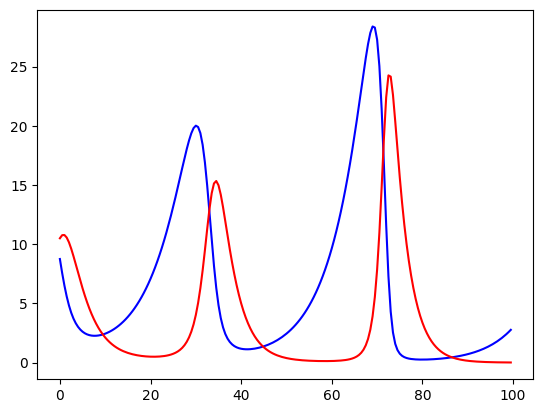

In [2]:
#Vytvoreni modelu
class PopulationModel(EKModel):
    def fk(self, k, x):
        r = x[0]
        p = x[1]
        a = x[2]
        b = x[3]
        c = x[4]
        d = x[5]
        return np.array([
            r+self.D*(a*r - b*r*p),
            p + self.D*(d*r*p - c*p),
            a,
            b,
            c,
            d
        ])
    def Fk(self, k, x):
        r = x[0]
        p = x[1]
        a = x[2]
        b = x[3]
        c = x[4]
        d = x[5]

        F = np.eye((6))
        F[0,0] = 1 + self.D*(a - b*p)
        F[0,1] = -self.D*b*r
        F[0,2] = self.D*r
        F[0,3] = -self.D*r*p

        F[1,0] = self.D*d*p
        F[1,1] = 1+self.D*(d*r - c)
        F[1,4] = -self.D*p
        F[1,5] = self.D*r*p
        return F
    def gk(self, k, x):
        return x[0:2]
    def Gk(self, k):
        return(np.array([[1, 0, 0, 0, 0, 0],
                         [0, 1, 0, 0, 0, 0]]))
    def Qk(self, k):
        #Dokonaly model
        return np.zeros((6,6)) 
        Q = (((0.001)**2)*np.eye(6))
        Q[0,0] = (0.01)**2
        Q[1,1] = (0.01)**2
        return Q
    def Rk(self, k, x):
        r = x[0]
        p = x[1]
        return np.array([
            [(0.1*r)**2, 0],
            [0, (0.1*p)**2]
        ])

PM = PopulationModel()
D = 0.5
PM.set_D(D)
PS = EKSystem(PM, np.array([10, 10, 0.15,0.04,0.3,0.04]))

PS.run(200)
x = np.arange(len(PS.tracex[:, 1]))*D
plt.plot(x,PS.tracex[:, 0], "b")
plt.plot(x, PS.tracex[:, 1],"r")
plt.show()

In [3]:
#Vytvoreni filtru
mu0 = np.array([40, 30, 0.3, 0.05, 0.2, 0.06])
print(mu0)
sigma0 = np.diag([1, 1, 1e1, 1e1, 1e1, 1e1])
EKF = EKFiltr(PS, mu0, sigma0)
EKF.run()

[40.   30.    0.3   0.05  0.2   0.06]


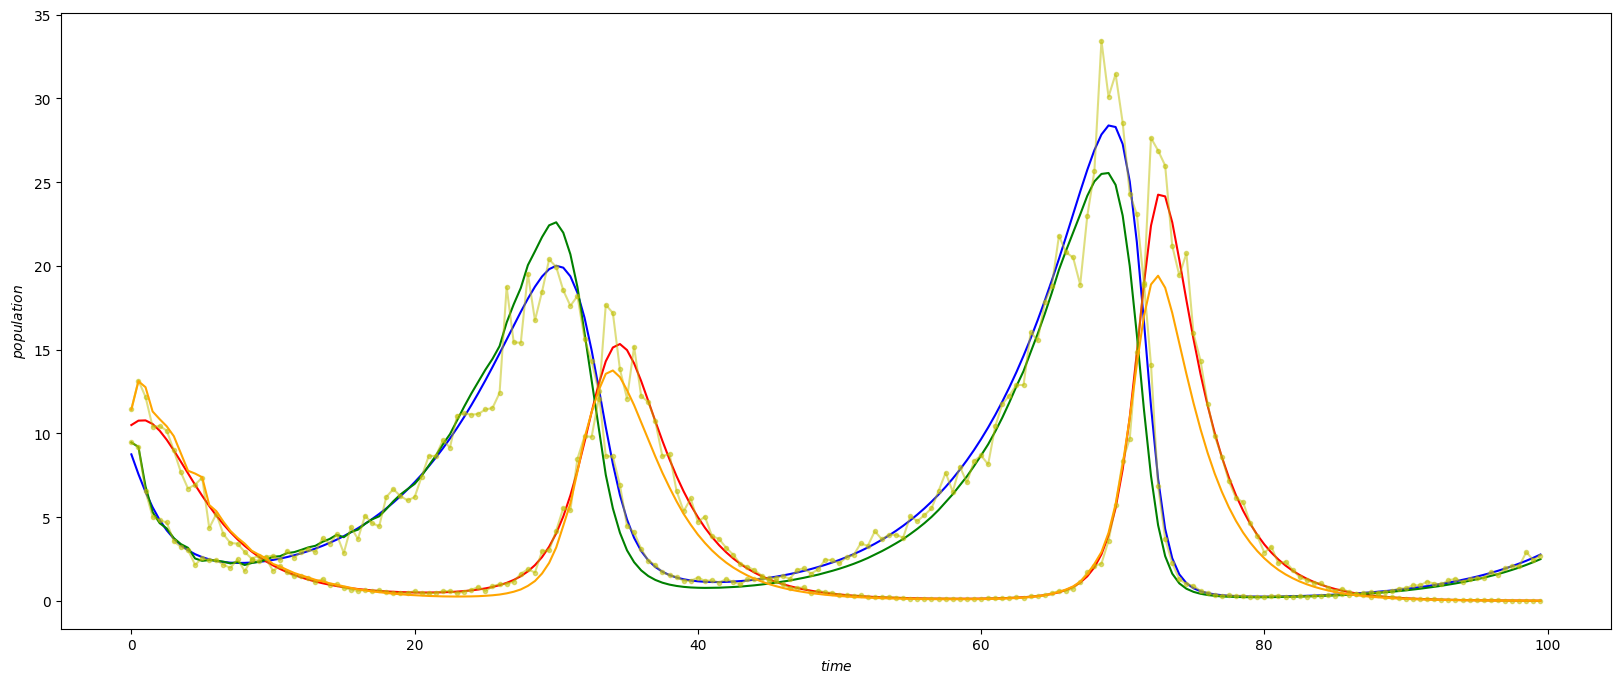

In [4]:
plt.figure(figsize=(20, 8))
plt.subplot(111)
plt.plot(x, PS.tracex[:, 0], "b")
plt.plot(x, PS.tracex[:, 1], "r")

plt.plot(x, EKF.trace_mu[:, 0], 'g-')
plt.plot(x, PS.tracey[:, 0], 'y.-', alpha=0.5)
plt.plot(x, PS.tracey[:, 1], 'y.-', alpha=0.5)
plt.plot(x, EKF.trace_mu[:, 1], 'orange')
plt.xlabel('$time$')
plt.ylabel('$population$')
plt.show()

In [5]:
def interactive_graph_for_sliders(PS,D,mu_0, sigma_0):
    sigma_0 = np.diag(sigma_0)
    x = np.arange(len(PS.tracex[:, 1]))*D
    EKF = EKFiltr(PS, mu_0, sigma_0)
    EKF.run()
    plt.figure(figsize=(20, 8))
    plt.subplot(111)
    plt.plot(x, PS.tracex[:, 0], "b", label="Rabbit")
    plt.plot(x, PS.tracex[:, 1], "r", label="Fox")

    plt.plot(x, EKF.trace_mu[:, 0], 'g-', label="Rabbit-Kalman")
    plt.plot(x, PS.tracey[:, 0], 'c.-', alpha=0.4, label="Rabbir-Measure")
    plt.plot(x, PS.tracey[:, 1], 'y.-', alpha=0.4, label="Fox-Measure")
    plt.plot(x, EKF.trace_mu[:, 1], 'orange', label="Fox-Kalman")
    plt.xlabel('$time$')
    plt.ylabel('$population$')
    plt.legend(loc="upper right")
    plt.show()

    plt.figure(figsize=(20, 8))
    plt.subplot(111)
    plt.plot(x, PS.tracex[:, 2], "b", label="Alpha")
    plt.plot(x, PS.tracex[:, 3], "r", label="Beta")
    plt.plot(x, PS.tracex[:, 4], "g", label="Gamma")
    plt.plot(x, PS.tracex[:, 5], "m", label="Delta")

    plt.plot(x, EKF.trace_mu[:, 2], 'c', label="Rabbit-Kalman")
    plt.plot(x, EKF.trace_mu[:, 3], 'tab:pink', label="Beta-Kalman")
    plt.plot(x, EKF.trace_mu[:, 4], 'y', label="Rabbit-Kalman")
    plt.plot(x, EKF.trace_mu[:, 5], 'orange', label="Fox-Kalman")
    plt.xlabel('$time$')
    plt.ylabel('$Parameters$')
    plt.legend(loc="upper right")
    plt.show()

def on_start_clicked(button):
    with output:
        clear_output(True)
        interactive_graph_for_sliders(PS, D, 
                                  np.array([p.value,f.value,a.value, b.value, c.value, d.value]), 
                                  np.array([sp.value,sf.value,sa.value, sb.value, sc.value, sd.value]))
    
def on_reset_clicked(b):
  with output:
    clear_output(True)
    reset_sliders()

def reset_sliders():
    p.value = 10
    f.value = 10
    a.value = 0.15
    b.value = 0.04
    c.value = 0.3
    d.value = 0.04
    sp.value = 1
    sf.value = 1
    sa.value = 1e-1
    sb.value = 1e-1
    sc.value = 1e-1
    sd.value = 1e-1

output = wgs.Output()
p  = wgs.IntSlider(value = 10, min = 1, max = 50, step = 1, description = r'Rabbit Count', disabled=False)
f  = wgs.IntSlider(value = 10, min = 1, max = 50, step = 1, description = r'Fox Count', disabled=False)
a  = wgs.FloatSlider(value = 0.15, min = 0, max = 1, step = 0.01, description = r'Alpha', disabled=False)
b  = wgs.FloatSlider(value = 0.04, min = 0, max = 1, step = 0.01, description = r'Beta', disabled=False)
c  = wgs.FloatSlider(value = 0.3, min = 0, max = 1, step = 0.01, description = r'Gamma', disabled=False)
d  = wgs.FloatSlider(value = 0.04, min = 0, max = 1, step = 0.01, description = r'Delta', disabled=False)

sp  = wgs.IntSlider(value = 1, min = 0, max = 100, step = 0.01, description = r'rozp. Rabbits', disabled=False)
sf  = wgs.IntSlider(value = 1, min = 0, max = 100, step = 0.01, description = r'rozp. Foxes', disabled=False)
sa  = wgs.FloatSlider(value = 1e-1, min = 0, max = 1, step = 0.0001, description = r'rozp. Alpha', disabled=False)
sb  = wgs.FloatSlider(value = 1e-1, min = 0, max = 1, step = 0.0001, description = r'rozp. Beta', disabled=False)
sc  = wgs.FloatSlider(value = 1e-1, min = 0, max = 1, step = 0.0001, description = r'rozp. Gamma', disabled=False)
sd  = wgs.FloatSlider(value = 1e-1, min = 0, max = 1, step = 0.0001, description = r'rozp. Delta', disabled=False)
run_button = wgs.Button(description='Run')
run_button.on_click(on_start_clicked)
reset_button = wgs.Button(description='Reset')
reset_button.on_click(on_reset_clicked)

row1 = HBox( [p, f] )
row2 = HBox( [sp, sf] )
row3 = HBox( [a, b, c, d] )
row4 = HBox( [sa, sb, sc, sd] )
row5 = HBox( [reset_button, run_button])
ui = VBox( [row1, row2, row3, row4, row5] )
# out = wgs.interactive_output(interactive_graph_for_sliders, {'PS':PS, 'D':D, 'mu_0':np.array([p.value,f.value,a.value,b.value,c.value,d.value]), 'sigma_0':np.array([sp.value,sf.value,sa.value,sb.value,sc.value,sd.value])} )
display(ui)
output

Output()